<a href="https://colab.research.google.com/github/archanadby05/Neural_Network_from_Scratch/blob/master/activation-functions/05_leaky_relu_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Leaky ReLU Activation and Comparison with ReLU

### 01. Leaky ReLU Function and Derivative

We define the Leaky ReLU activation function, which allows a small gradient when inputs are negative.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

*Explanation:*

Leaky ReLU fixes the dying ReLU issue by assigning a small slope (e.g., 0.01) to negative inputs. This ensures gradients keep flowing, even for neurons receiving negative signals.

### 02. Plot Leaky ReLU Curve


We visualize the behavior of Leaky ReLU compared to regular ReLU.

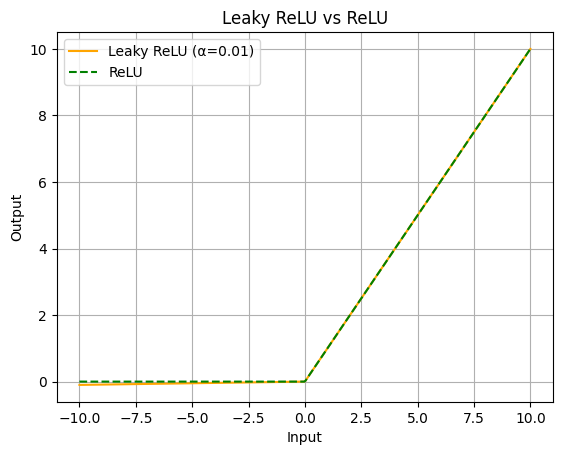

In [2]:
x = np.linspace(-10, 10, 400)
y_leaky = leaky_relu(x)
y_relu = np.maximum(0, x)

plt.plot(x, y_leaky, label='Leaky ReLU (α=0.01)', color='orange')
plt.plot(x, y_relu, label='ReLU', color='green', linestyle='--')
plt.title("Leaky ReLU vs ReLU")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)
plt.legend()
plt.show()

*Explanation:*

Leaky ReLU has a slight negative slope when x < 0, unlike ReLU which is flat. This allows neurons to “stay alive” during training instead of becoming permanently inactive.

### 03. Advantage of Leaky ReLU

*Explanation:*

In standard ReLU, once a neuron outputs 0 and gets no gradient, it may die permanently. Leaky ReLU helps avoid this by maintaining a small gradient for negative values, enabling the neuron to recover and participate in learning.

### 04. Neural Layer Example: ReLU vs Leaky ReLU

We simulate activations from a simple layer using both functions.

In [3]:
np.random.seed(0)

inputs = np.random.randn(5, 3)
weights = np.random.randn(3, 4)
biases = np.random.randn(1, 4)

# Linear transformation
z = np.dot(inputs, weights) + biases

# Apply activations
a_relu = np.maximum(0, z)
a_leaky = leaky_relu(z)

print("ReLU Activations:\n", a_relu)
print("\nLeaky ReLU Activations:\n", a_leaky)

ReLU Activations:
 [[0.         5.3683107  0.         1.09791121]
 [0.         0.         3.65161105 2.42616465]
 [0.33571523 3.10441838 1.32562835 0.31682763]
 [0.         5.07934809 0.         0.47455443]
 [0.         3.3666553  0.7472152  0.51869457]]

Leaky ReLU Activations:
 [[-6.66722533e-03  5.36831070e+00 -5.44438826e-04  1.09791121e+00]
 [-3.09227184e-03 -2.10518667e-02  3.65161105e+00  2.42616465e+00]
 [ 3.35715232e-01  3.10441838e+00  1.32562835e+00  3.16827632e-01]
 [-1.25251560e-02  5.07934809e+00 -6.35774819e-03  4.74554432e-01]
 [-3.66586977e-03  3.36665530e+00  7.47215195e-01  5.18694569e-01]]


*Explanation:*

The output from ReLU contains more zeros (dead activations), while Leaky ReLU allows small negative values to pass through, improving robustness during training.